In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
#import the library
import numpy as np
import pandas as pd
import pandas_datareader as data
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#load dataset
df = pd.read_csv("../data/BTC-USD.csv")

In [4]:
#data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-10,4776.209961,4922.169922,4765.100098,4781.990234,4781.990234,1597139968
1,2017-10-11,4789.250000,4873.729980,4751.629883,4826.479980,4826.479980,1222279936
2,2017-10-12,4829.580078,5446.910156,4822.000000,5446.910156,5446.910156,2791610112
3,2017-10-13,5464.160156,5840.299805,5436.850098,5647.209961,5647.209961,3615480064
4,2017-10-14,5643.529785,5837.700195,5591.640137,5831.790039,5831.790039,1669030016


In [5]:

df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

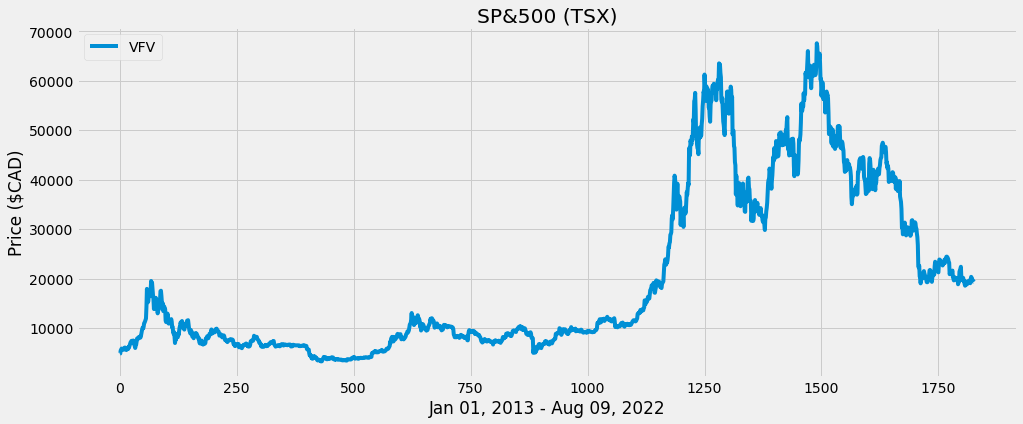

In [7]:
#plotting dataset with matplotlib 

plt.figure(figsize=(15,6))
plt.plot(df['Adj Close'], label = 'VFV')
plt.title('SP&500 (TSX)')
plt.xlabel('Jan 01, 2013 - Aug 09, 2022')
plt.ylabel('Price ($CAD)')
plt.legend(loc = 'upper left')
plt.show()

In [9]:
#simple moving average.

EMA30 = pd.DataFrame()
EMA30['Close'] = df['Adj Close'].ewm(span=30, adjust=False).mean()
EMA30.tail()

,Close
1822,19842.285187
1823,19823.224828
1824,19796.988926
1825,19774.371949
1826,19745.069853


In [10]:
EMA100 = pd.DataFrame()
EMA100['Close'] = df['Adj Close'].ewm(span=100, adjust=False).mean()
EMA100.tail()

,Close
1822,22129.309211
1823,22078.171397
1824,22025.466386
1825,21974.396275
1826,21921.837724


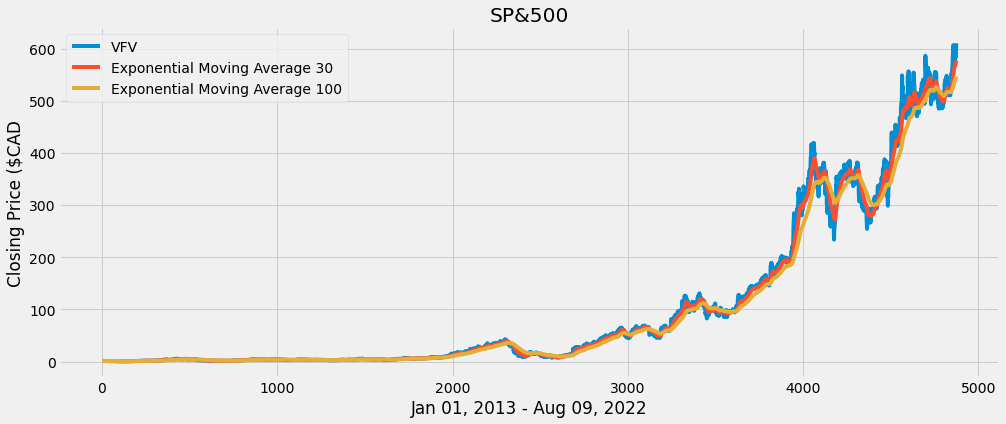

In [14]:
plt.figure(figsize=(15,6))
plt.plot(df['Adj Close'], label = 'VFV') #I decided to use Adj Close price becasue it factors in anything that might affect the stock price after the market closes, like: dividens, splits, etc. 
plt.plot(EMA30['Close'], label = 'Exponential Moving Average 30')
plt.plot(EMA100['Close'], label = 'Exponential Moving Average 100')
plt.title('SP&500')
plt.xlabel('Jan 01, 2013 - Aug 09, 2022')
plt.ylabel('Closing Price ($CAD')
plt.legend(loc = 'upper left')
plt.show()

In [11]:
#combining everything into new dataset.

data = pd.DataFrame()
data['SP500'] = df['Adj Close']
data['EMA30'] = EMA30['Close']
data['EMA100'] = EMA100['Close']
data.tail()

,SP500,EMA30,EMA100
1822,19955.443359,19842.285187,22129.309211
1823,19546.849609,19823.224828,22078.171397
1824,19416.568359,19796.988926,22025.466386
1825,19446.425781,19774.371949,21974.396275
1826,19320.189453,19745.069853,21921.837724


In [12]:
def signal(data):
    buy = []
    sell = []
    condition = 0
    
    for day in range(len(data)):
        
        if data['EMA30'][day] > data['EMA100'][day]:    #buying when EMA30 cross EMA100 from down to top
            if condition != 1:
                buy.append(data['SP500'][day])
                sell.append(np.nan)
                condition = 1
            else:
                buy.append(np.nan)
                sell.append(np.nan)
            
        elif data['EMA30'][day] < data['EMA100'][day]:  #selling when EMA30 cross EMA100 from top to bottom
            if condition != -1:
                sell.append(data['SP500'][day])
                buy.append(np.nan)
                condition = -1
            else:
                buy.append(np.nan)
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            
    return (buy, sell) 

In [13]:
signals = signal (data)
data['buy'] = signals[0]
data['sell'] = signals[1]
data

,SP500,EMA30,EMA100,buy,sell
0,4781.990234,4781.990234,4781.990234,NaN,NaN
1,4826.479980,4784.860540,4782.871219,4826.47998,NaN
2,5446.910156,4827.573419,4796.020505,NaN,NaN
3,5647.209961,4880.453196,4812.875742,NaN,NaN
4,5831.790039,4941.829766,4833.052262,NaN,NaN
...,...,...,...,...,...
1822,19955.443359,19842.285187,22129.309211,NaN,NaN
1823,19546.849609,19823.224828,22078.171397,NaN,NaN
1824,19416.568359,19796.988926,22025.466386,NaN,NaN
1825,19446.425781,19774.371949,21974.396275,NaN,NaN


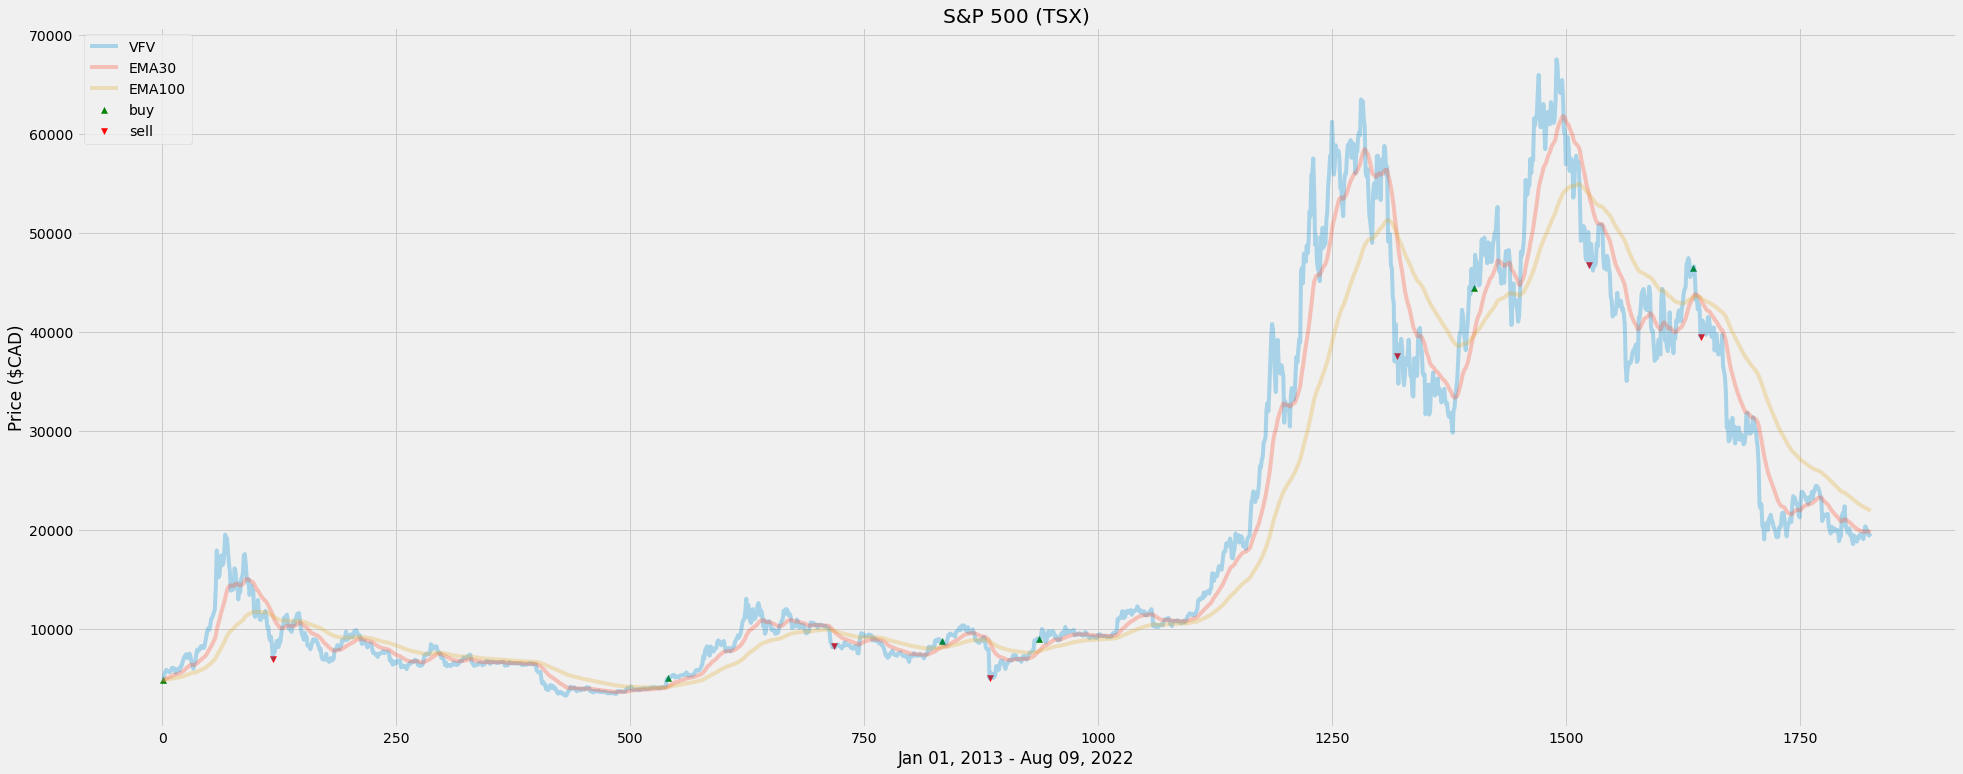

In [14]:
plt.figure(figsize = (30, 12))
plt.plot(data['SP500'], label = 'VFV', alpha = 0.3)
plt.plot(data['EMA30'], label = 'EMA30', alpha = 0.3)
plt.plot(data['EMA100'], label = 'EMA100', alpha = 0.3)
plt.scatter(data.index, data['buy'], label = 'buy', marker = '^', color = 'green')
plt.scatter(data.index, data['sell'], label = 'sell', marker = 'v', color = 'red')
plt.title('S&P 500 (TSX)')
plt.xlabel('Jan 01, 2013 - Aug 09, 2022')
plt.ylabel('Price ($CAD)')
plt.legend(loc = 'upper left')
plt.show()

#Insights
- The buying signal appears to be effective. Selling not so much.
- It is also important to consider when to exit a trade. (Need to work on that).
- A stop loss must be set large enough for the trade to be successful.